<a href="https://colab.research.google.com/github/AntBap23/google-colab-practice-guided-projects/blob/main/SalesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [95]:
df = pd.read_csv('all_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [96]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Order Month'] = df['Order Date'].dt.month_name()

df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

df.groupby('Order Month')['Sales'].sum().sort_values(ascending=False).head(1)



<ipython-input-96-f6f4272a1598>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


,Sales
Order Month,
December,4613443.34


question 1. What was the highest month in sales?

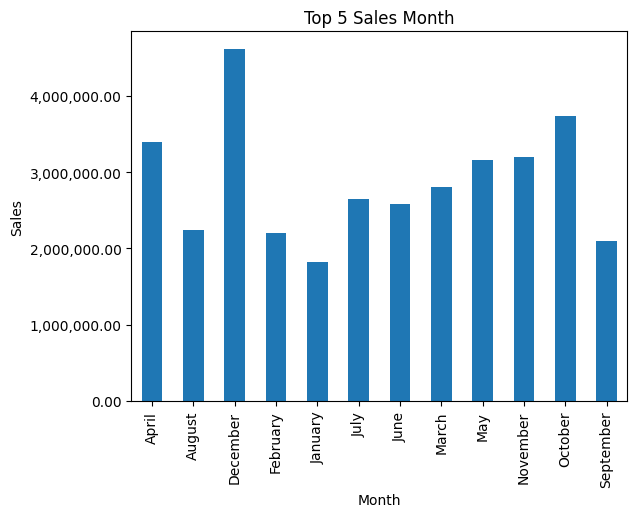

In [97]:
df_top_sales_month = df.groupby('Order Month')['Sales'].sum().head(12)
df_top_sales_month.plot(kind='bar')
plt.title('Top 5 Sales Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

question 2. What city sold the most product

Text(0, 0.5, 'Product')

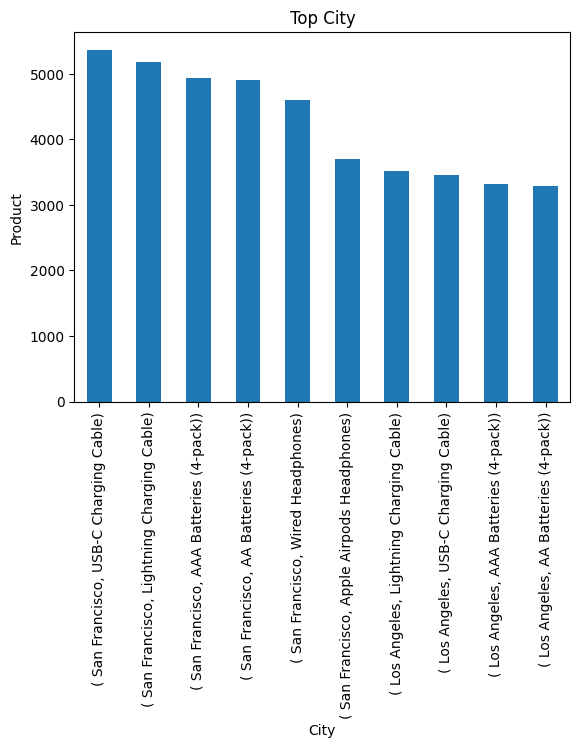

In [98]:
df['Purchase Address'] = df['Purchase Address'].fillna('')
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] if isinstance(x, str) and ',' in x else None)
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2] if isinstance(x, str) and ',' in x else None)



df_top_city = df.groupby('City')['Product'].value_counts().nlargest(10)
df_top_city.plot(kind='bar')
plt.title('Top City')
plt.xlabel('City')
plt.ylabel('Product')


question 3. What time should we run advertisements?

In [108]:
df['Order Hour'] = df['Order Date'].dt.hour



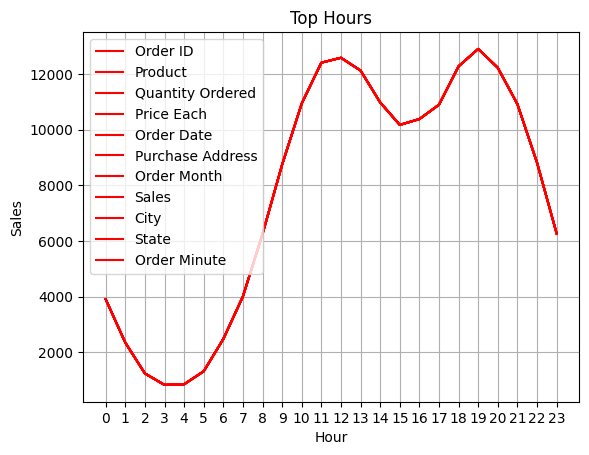

In [113]:
df_top_hour = df.groupby('Order Hour').count()
df_top_hour.plot(kind='line', color = 'red')
plt.title('Top Hours')
plt.xticks(df_top_hour.index)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.show()


question 4. What products are most likely to be sold together?

In [140]:
df_dupes = df[df['Order ID'].duplicated(keep=False)]
df_dupes.dropna(how = 'any', inplace = True)
df_dupes['Grouped'] = df_dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dupes = df_dupes[['Order ID', 'Grouped']].drop_duplicates()
df_dupes['Grouped'].value_counts()

<ipython-input-140-f87995d87ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dupes.dropna(how = 'any', inplace = True)
<ipython-input-140-f87995d87ef5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dupes['Grouped'] = df_dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,count
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
...,...
"Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable",1
"34in Ultrawide Monitor,LG Washing Machine",1
"20in Monitor,iPhone",1


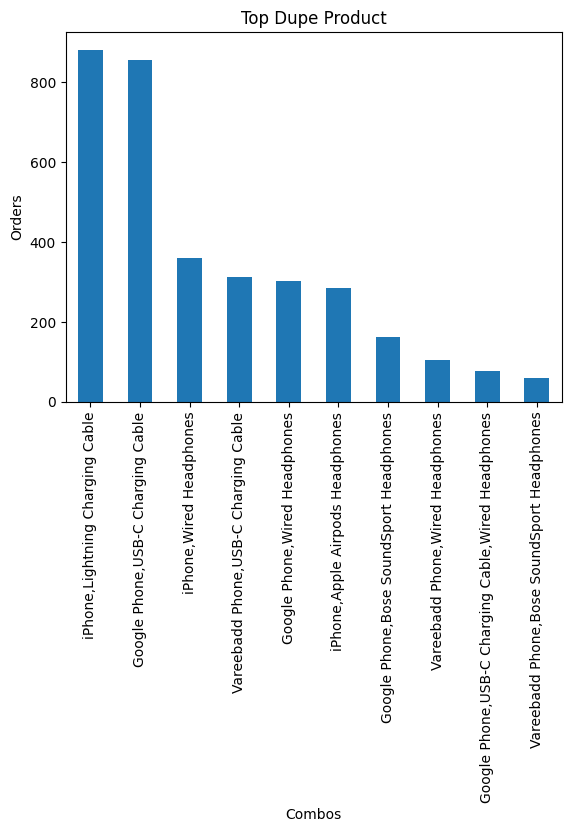

In [144]:
df_top_dupe_product = df_dupes['Grouped'].value_counts().head(10)
df_top_dupe_product.plot(kind='bar')
plt.title('Top Dupe Product')
plt.xlabel('Combos')
plt.ylabel('Orders')
plt.show()


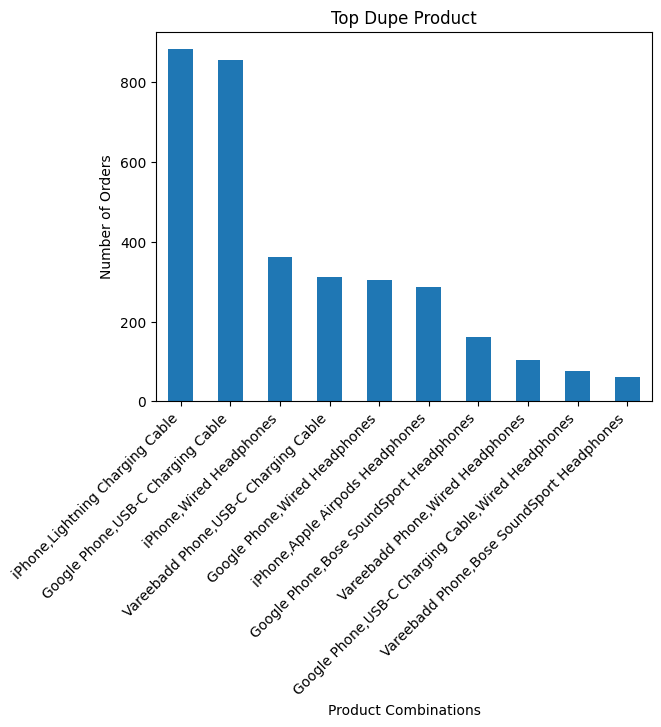

In [146]:
df_top_dupe_product = df_dupes['Grouped'].value_counts().head(10)
df_top_dupe_product.plot(kind='bar')
plt.title('Top Dupe Product')
plt.xlabel('Product Combinations')  # Modified x-axis label
plt.ylabel('Number of Orders')      # Modified y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

question 5. what product sold the most and why?

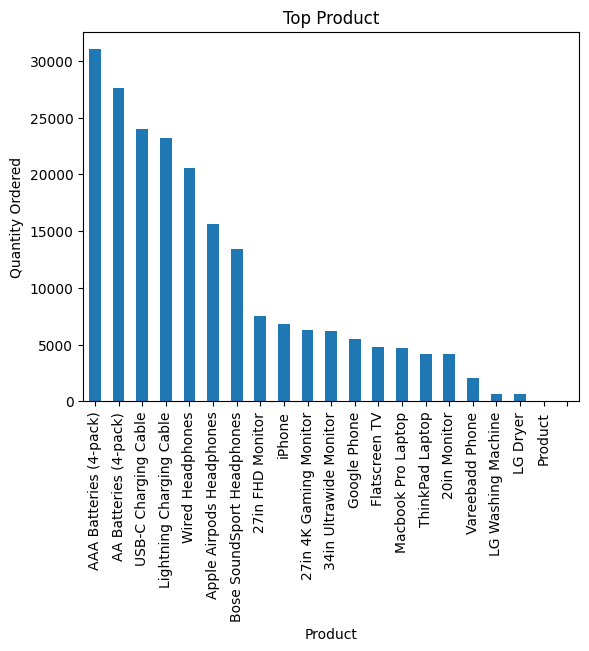

In [162]:
result = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
result.plot(kind='bar')
plt.title('Top Product')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

reason - AAA Batteries are cheap in comparison vs some of the other products